In [1]:
from nls import *
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
import torch
from reskan.Model import *
from reskan.Group_STR import *
from reskan import plot_results

In [2]:

params = {
    "b_func": lambda x: 0.5 * sp.exp(-0.02 * x) * sp.cos(x),
    "l_func": lambda x: 0.5 * sp.cos(x),
    "d_func": lambda x: 0.01,
    "eta1": 1.8 + 0.6j,
    "eta2": 1.8 + 0.6j,
    "eta0_1": 0,
    "eta0_2": 0,
    "C0": 1,
    "C1": 1
}

t_range = (-4, 4)
x_range = (-4, 4)
t_steps = 100
x_steps = 200
point_r = 3000
device = 'cuda' if torch.cuda.is_available() else 'cpu'

input_r, input_k, U_r, x = generate_data(t_range, x_range, t_steps, x_steps, point_r, params, device, noise=0.1, fun_type='two')

print(input_r.shape)
print(input_k.shape)
print(U_r.shape)

torch.Size([3000, 2])
torch.Size([20000, 2])
torch.Size([3000, 1])


In [3]:
rhs_des = [
    'u',                  
    'u_{x}',               
    'u_{xx}',              
    'u_{xxx}',             
    'u_{xxxx}',            
    'u^2',                 
    'u^3',                 
    'u_{x}^2',             
    'u_{x}^3',             
    'u * u_{x}',           
    'u * u_{xx}',          
    'u * u_{xxx}',         
    'u_{x} * u_{xx}',      
    'u * u_{x}^2',         
    'u^2 * u_{x}',         
    'u^2 * u_{xx}',        
    'u^2 * u_{xxx}',       
    'u_{x} * u_{xxx}',    
    'u_{xx} * u_{xxx}',    
    '|u|',                 
    '|u|^2',               
    '|u|^3',               
    '|u| * u',             
    '|u|^2 * u',           
    '|u|^3 * u',           
    'ui',                  
    'u_{x}i',             
    'u_{xx}i',             
    'u_{xxx}i',            
    'u_{xxxx}i'            
]

print(len(rhs_des))


30


In [4]:
Nd = 50 
Nh = 3  
Nb = 4   

model = VC_PIKAN(Nd=Nd, Nh=Nh, Nb=Nb, rhs_des=rhs_des, range_x=x_range, range_t=t_range, output_dim=2, seed=6666, grid=5, device=device)
model.fit(input_r, input_k, U_r, steps=50, alpha=0.1, lam=0.01, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls3_iter1')

checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0


<All keys matched successfully>

Original:
After pruning:
saving model version 0.1


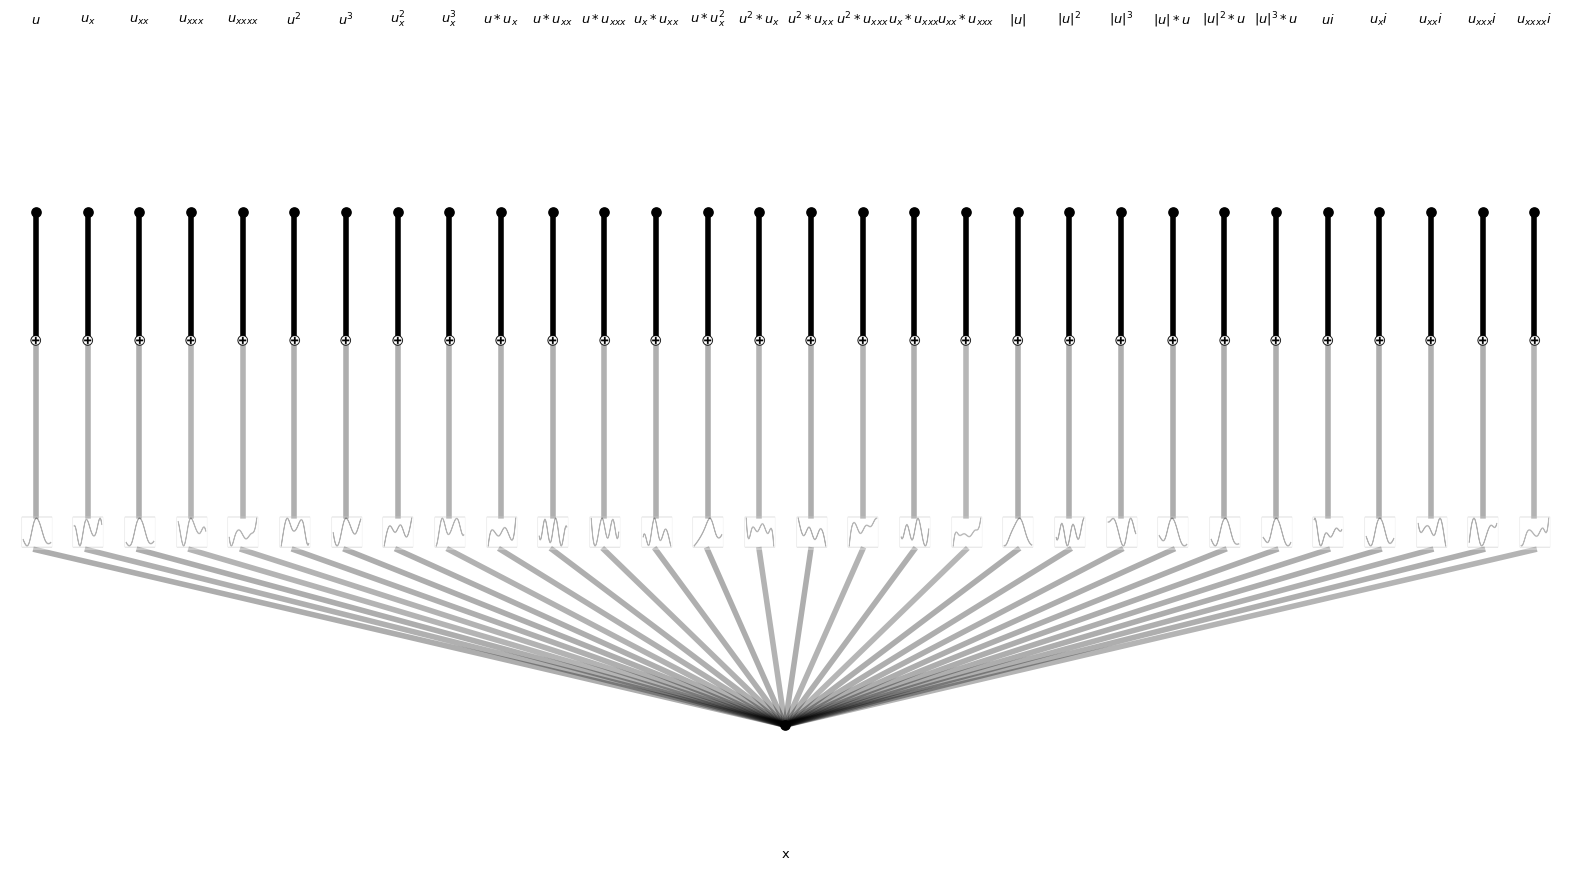

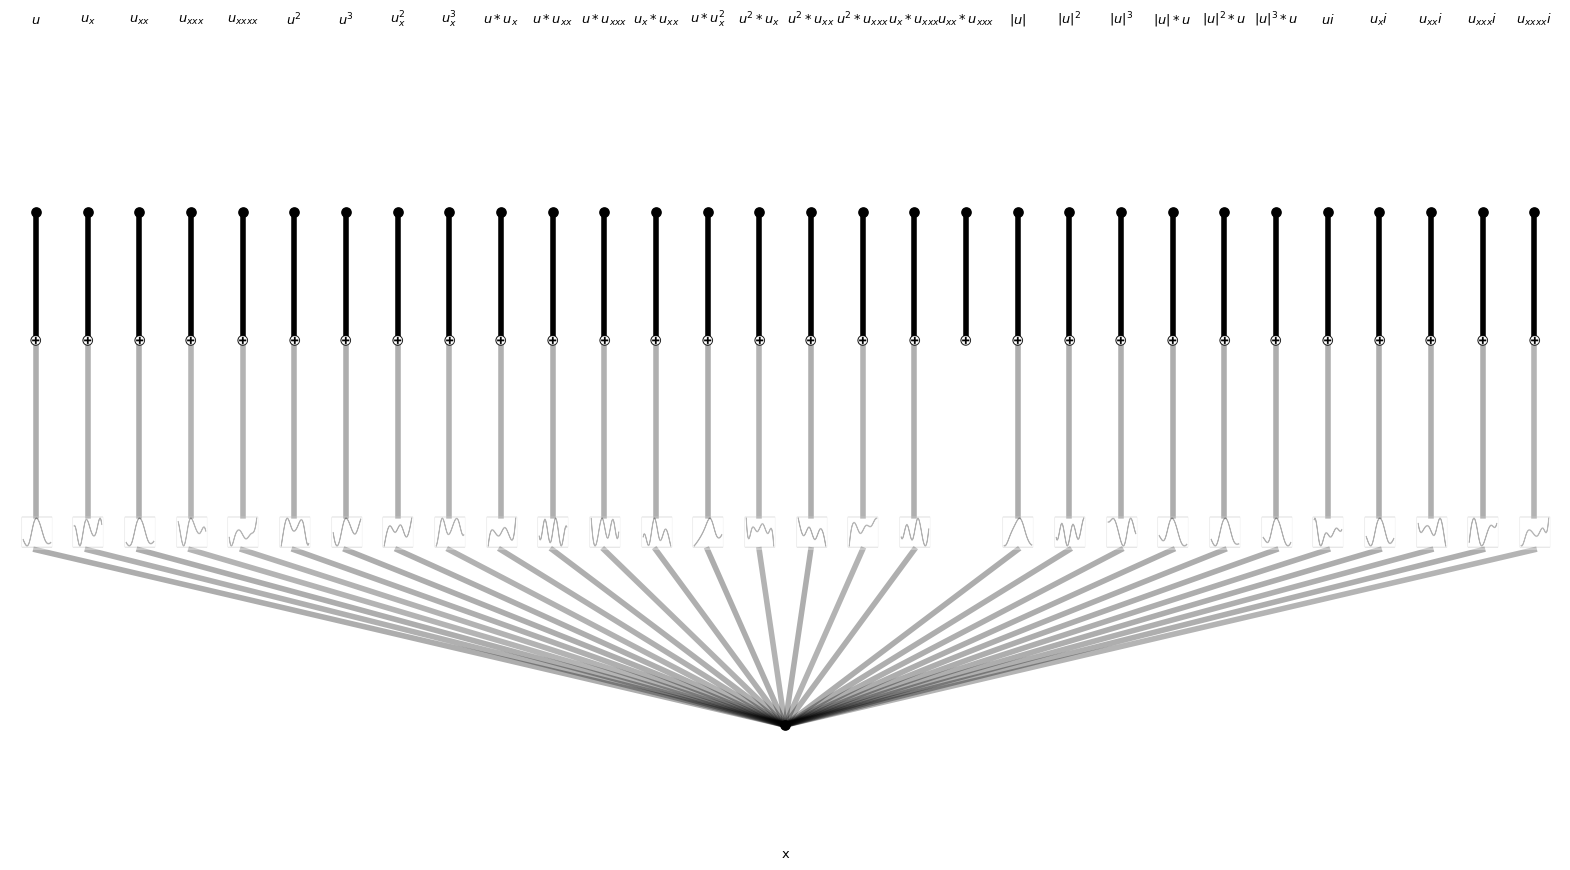

In [5]:
model.prune_kan(input_k, threshold=3e-2)

In [6]:
model.kan.refine(7)
model.fit(input_r, input_k, U_r, steps=50, alpha=0.1, lam=0.01, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls3_iter1_grid7')

saving model version 0.1


  0%|          | 0/50 [00:00<?, ?it/s]

Training on cuda


100%|██████████| 50/50 [10:55<00:00, 13.11s/it, loss=-4.45, loss_data=0.00894, loss_pde=0.00184, loss_reg=2.51]


Original:
After pruning:
saving model version 0.1


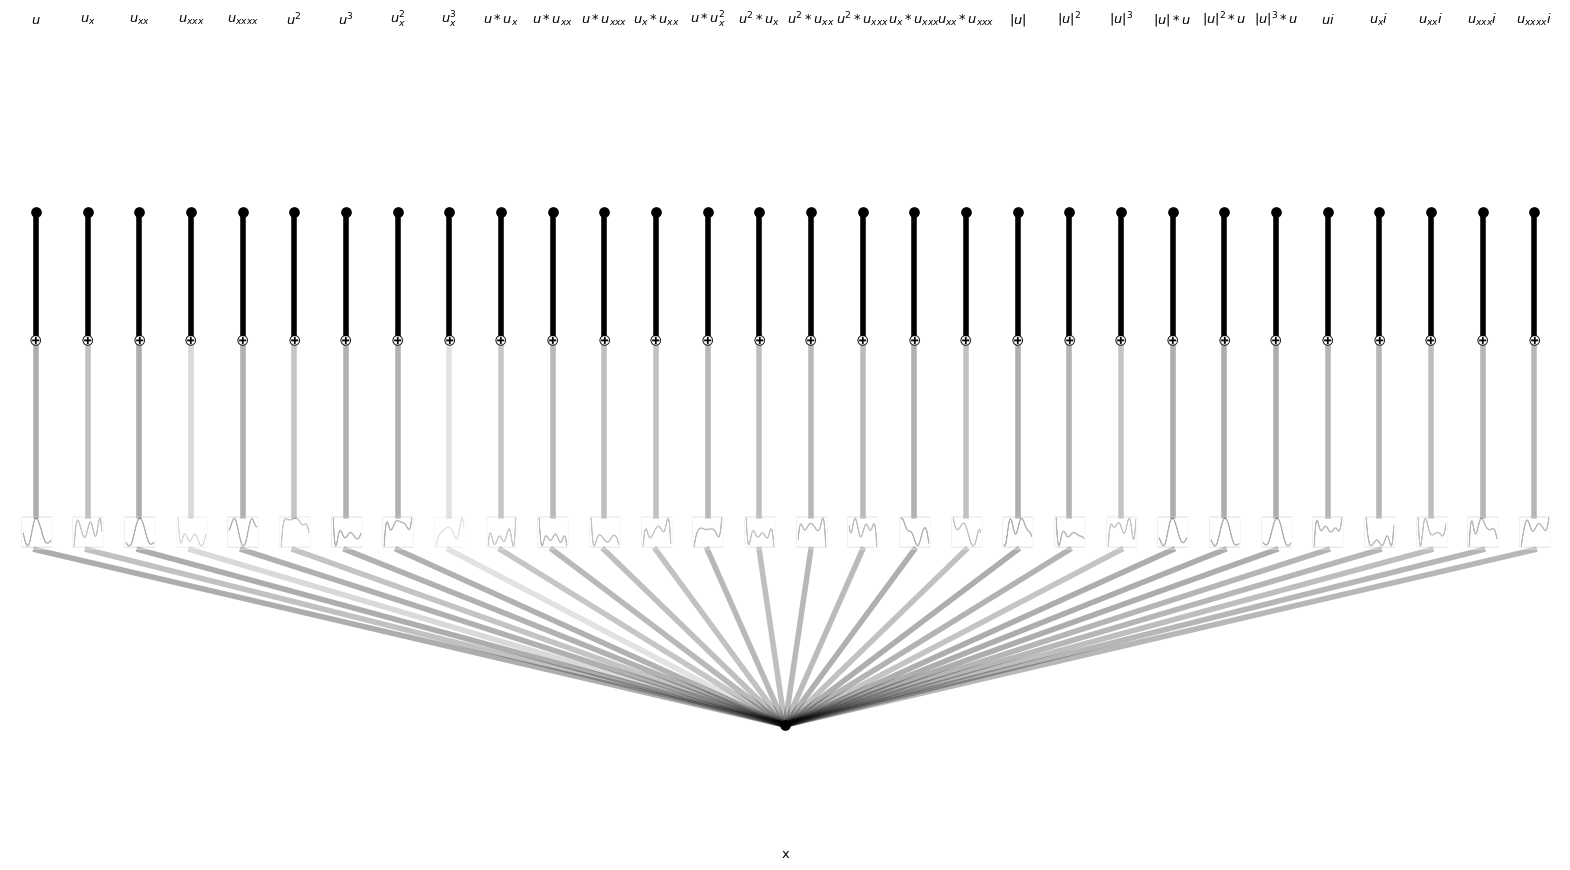

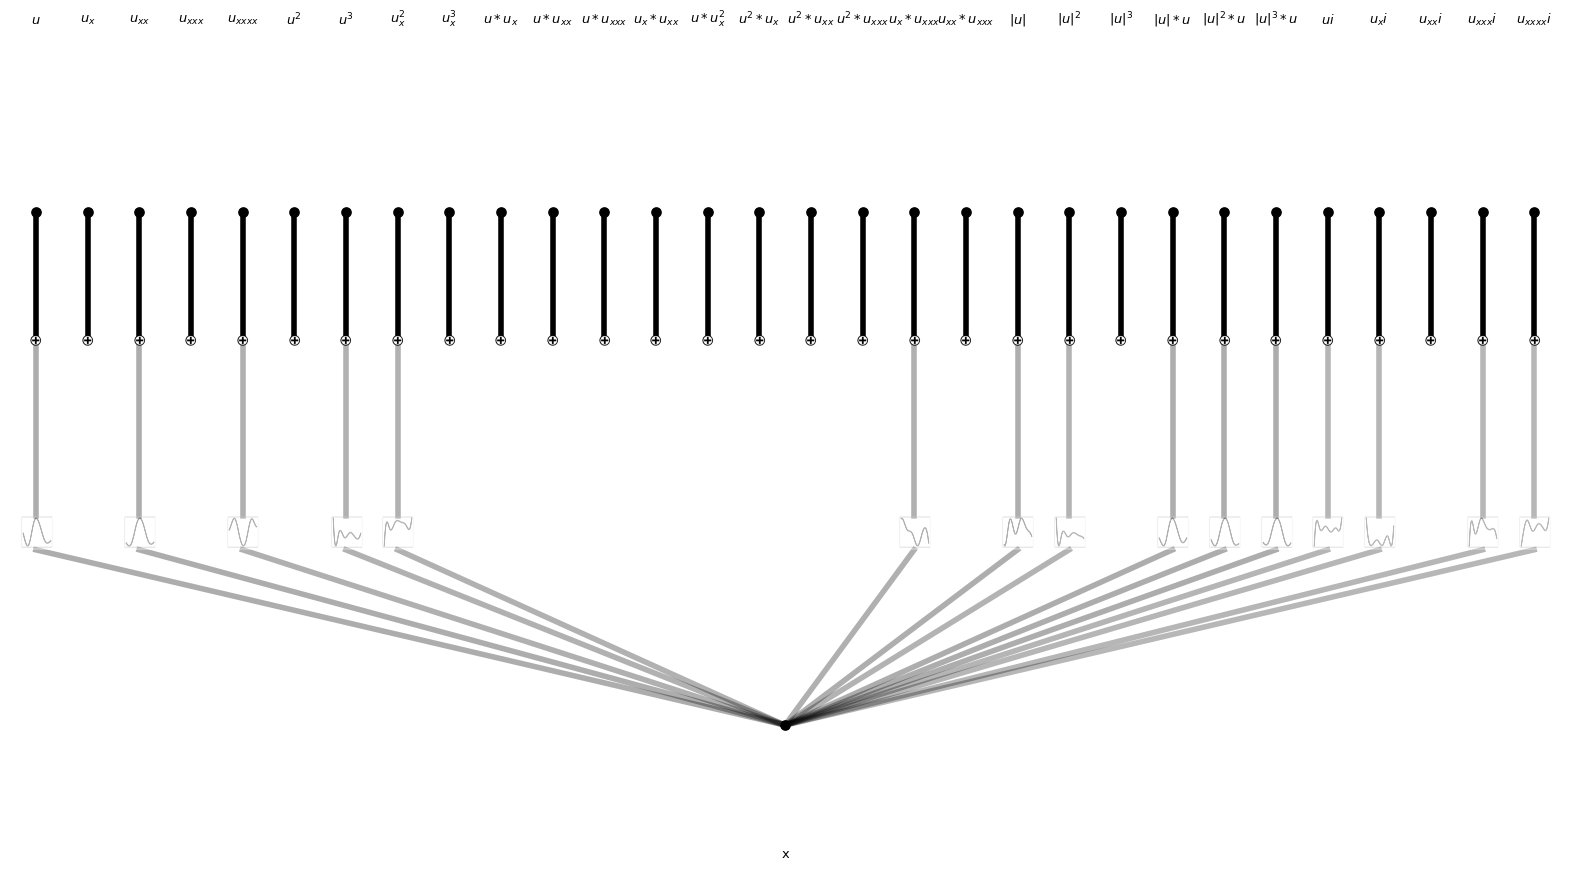

In [6]:
model.prune_kan(input_k, threshold=2.9e-2)

saving model version 0.3


findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family ['Times-Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-Roman' not found.
findfont: Font family 'Times-

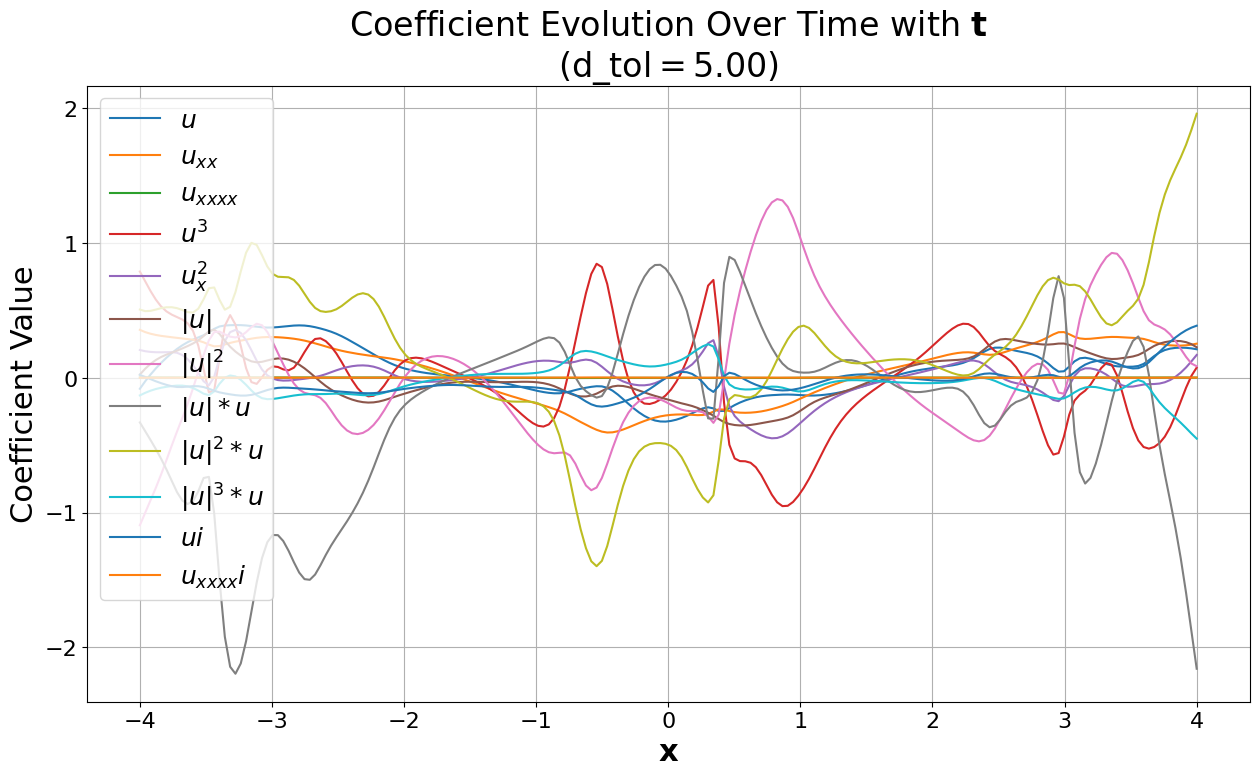

Plot saved as vc_plot/nls2_1.pdf


In [8]:
lam = 1e-5
d_tol = 5
W =  model.G_STRidge(input_k, lam, d_tol, t_steps, x_steps, type='complex')
model.ridge_plot(d_tol, x, filename="nls2_1")

saving model version 0.13
saving model version 0.14
saving model version 0.15


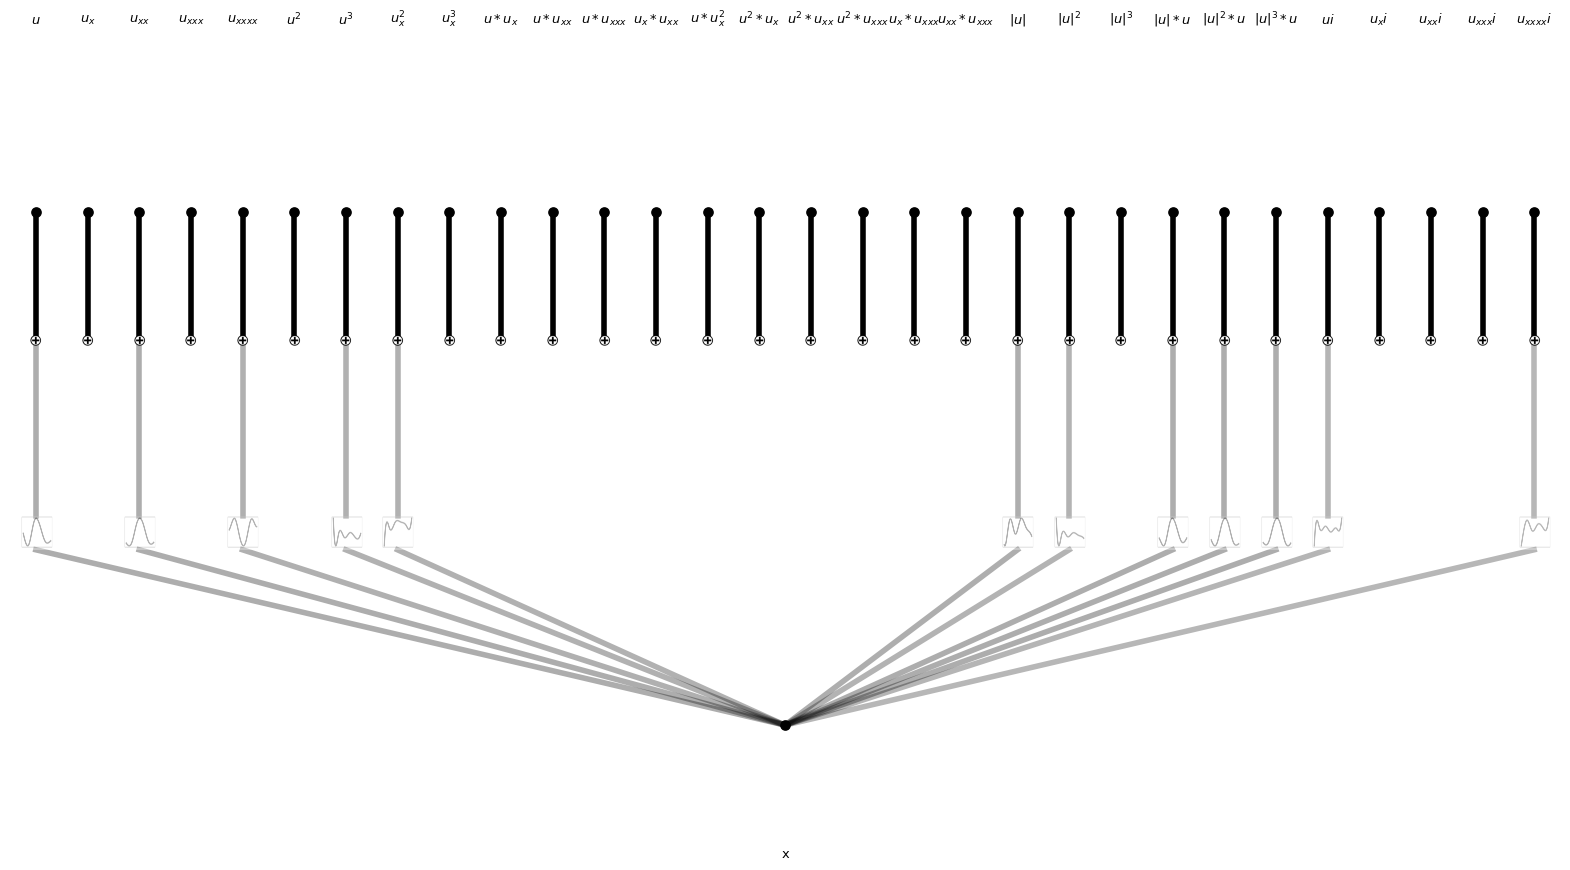

In [24]:
model.active_remove_edge(17)
model.active_remove_edge(26)
model.active_remove_edge(28)
model.kan_plot()

In [25]:
model.fit(input_r, input_k, U_r, steps=50, alpha=0.1, lam=0.01, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls3_iter2')

  0%|          | 0/50 [00:00<?, ?it/s]

Training on cuda


100%|██████████| 50/50 [10:59<00:00, 13.19s/it, loss=-4.5, loss_data=0.00899, loss_pde=0.00194, loss_reg=1.93] 


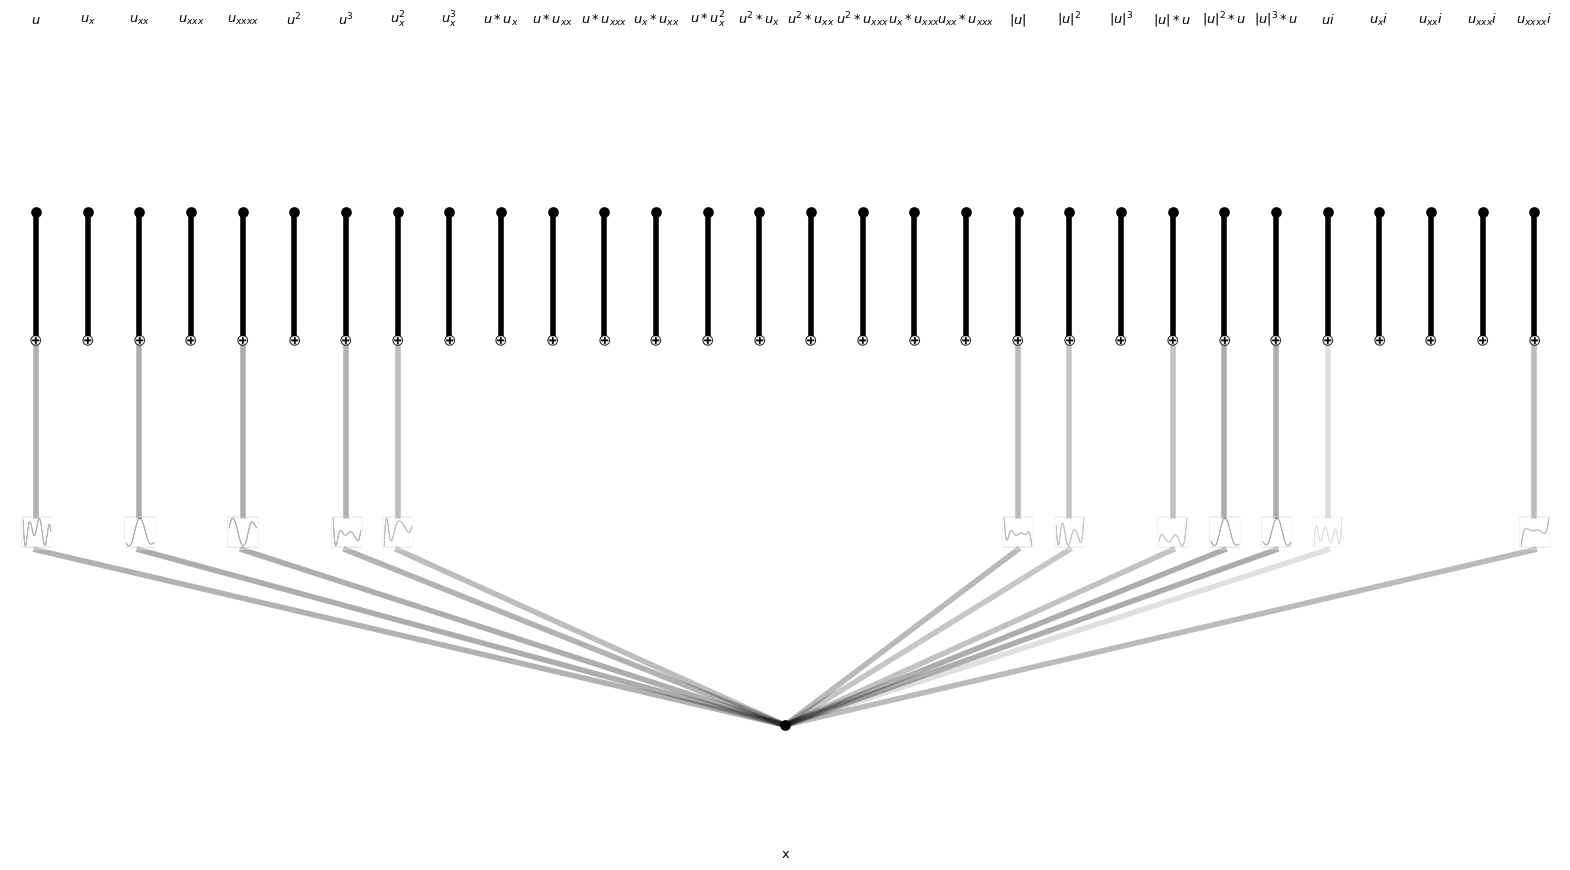

In [29]:
model.kan_plot()

saving model version 0.17


/home/ubuntu/miniconda3/envs/pykan-env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


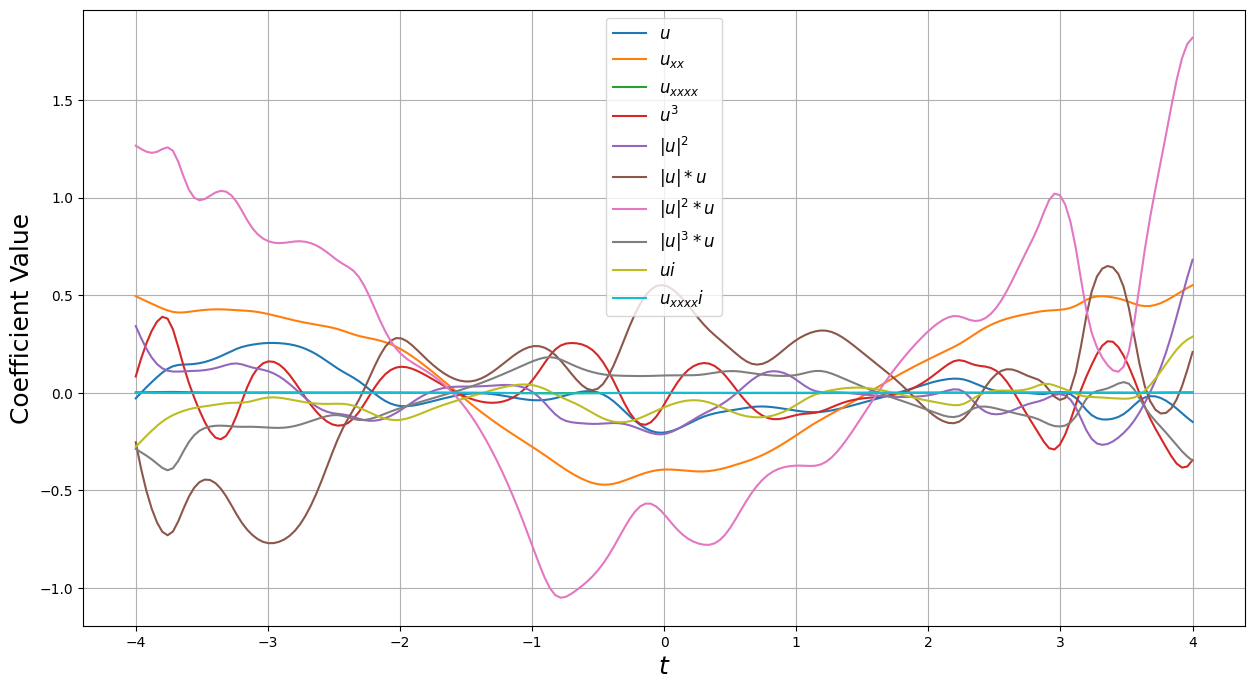

Plot saved as vc_plot/nls2_2.pdf


In [28]:
lam = 1e-5
d_tol = 5
W =  model.G_STRidge(input_k, lam, d_tol, t_steps, x_steps, type='complex')
model.ridge_plot(d_tol, x, filename="nls2_2")

saving model version 0.18
saving model version 0.19


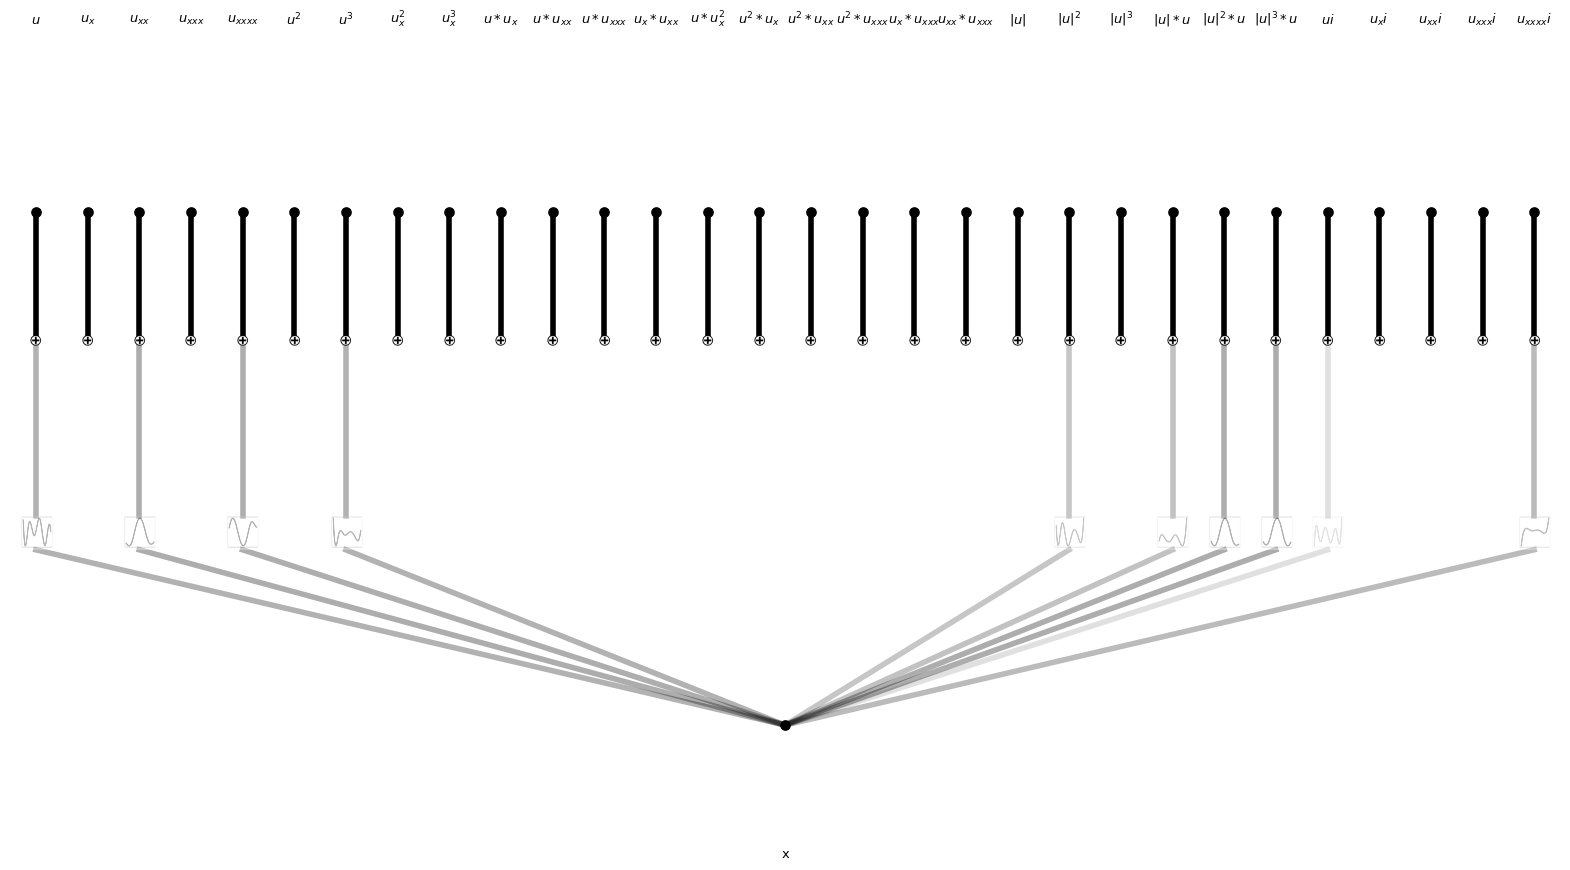

In [30]:
model.active_remove_edge(7)
model.active_remove_edge(19)
model.kan_plot()

In [31]:
model.fit(input_r, input_k, U_r, steps=50, alpha=0.1, lam=0.01, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls3_iter3')

  0%|          | 0/50 [00:00<?, ?it/s]

Training on cuda


100%|██████████| 50/50 [10:30<00:00, 12.61s/it, loss=-4.52, loss_data=0.00903, loss_pde=0.00209, loss_reg=1.7] 


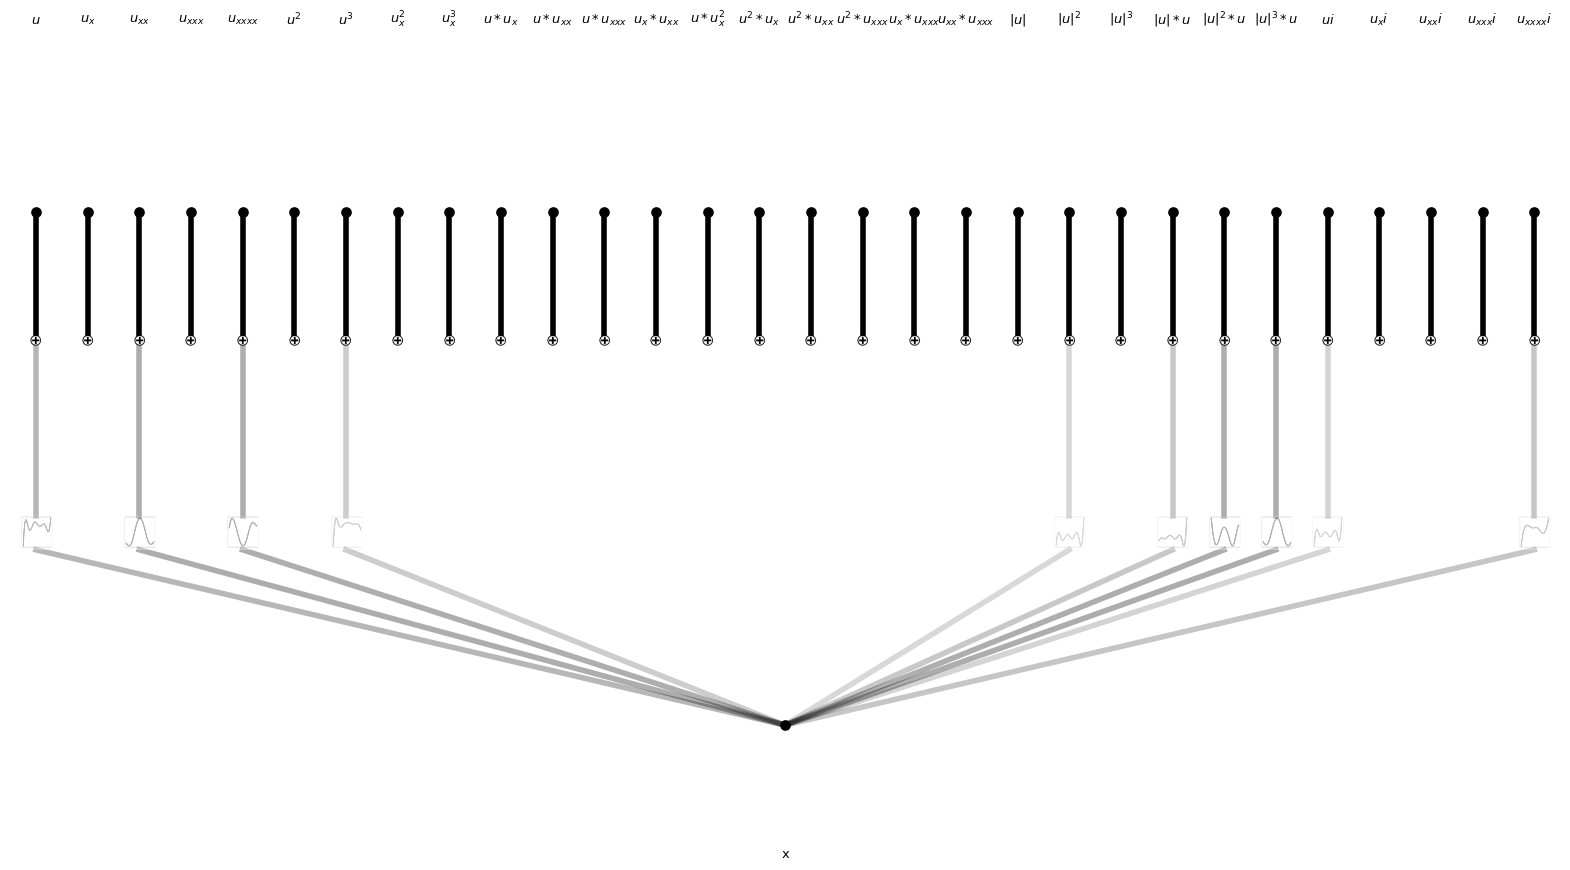

In [37]:
model.kan_plot()

saving model version 0.23


/home/ubuntu/miniconda3/envs/pykan-env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


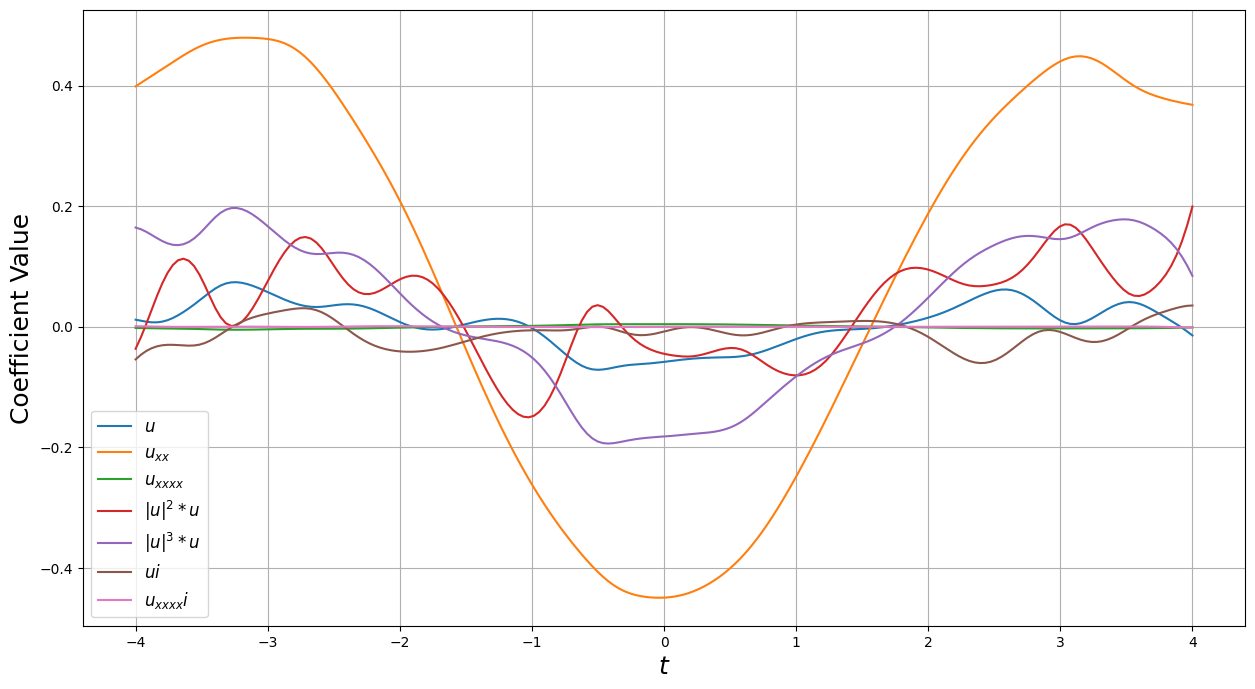

Plot saved as vc_plot/nls2_3.pdf


In [36]:
lam = 1e-5
d_tol = 4
W =  model.G_STRidge(input_k, lam, d_tol, t_steps, x_steps, type='complex')
model.ridge_plot(d_tol, x, filename="nls2_3")

saving model version 0.24
saving model version 0.25
saving model version 0.26


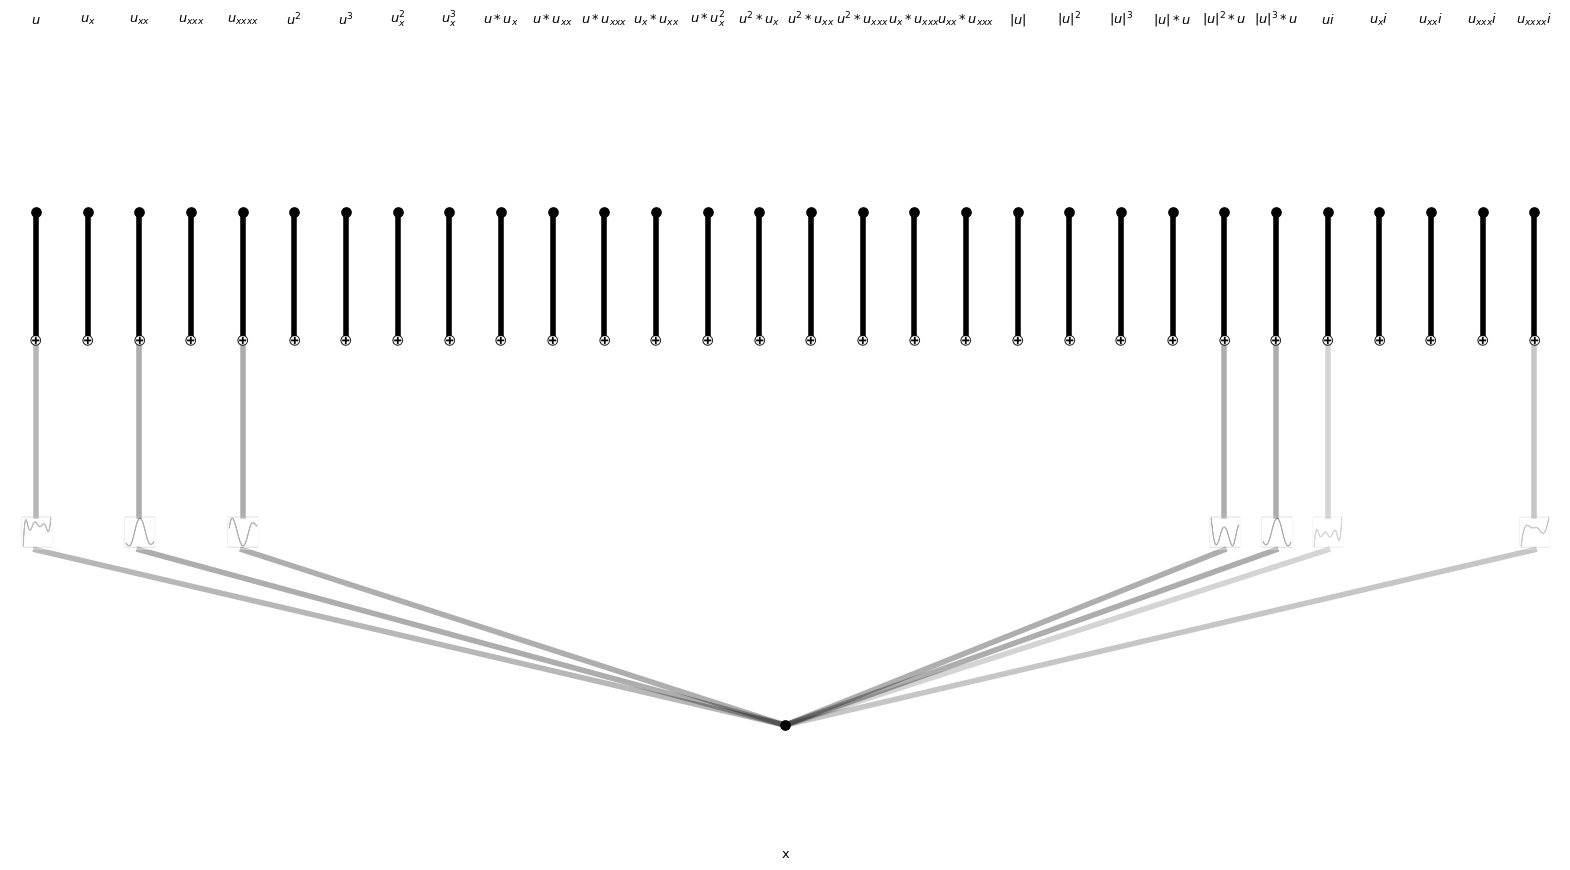

In [38]:
model.active_remove_edge(6)
model.active_remove_edge(20)
model.active_remove_edge(22)
model.kan_plot()

In [39]:
model.fit(input_r, input_k, U_r, steps=50, alpha=0.1, lam=0.01, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls3_iter4')

  0%|          | 0/50 [00:00<?, ?it/s]

Training on cuda


100%|██████████| 50/50 [10:52<00:00, 13.04s/it, loss=-4.52, loss_data=0.00903, loss_pde=0.00199, loss_reg=1.61]


saving model version 0.31


/home/ubuntu/miniconda3/envs/pykan-env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


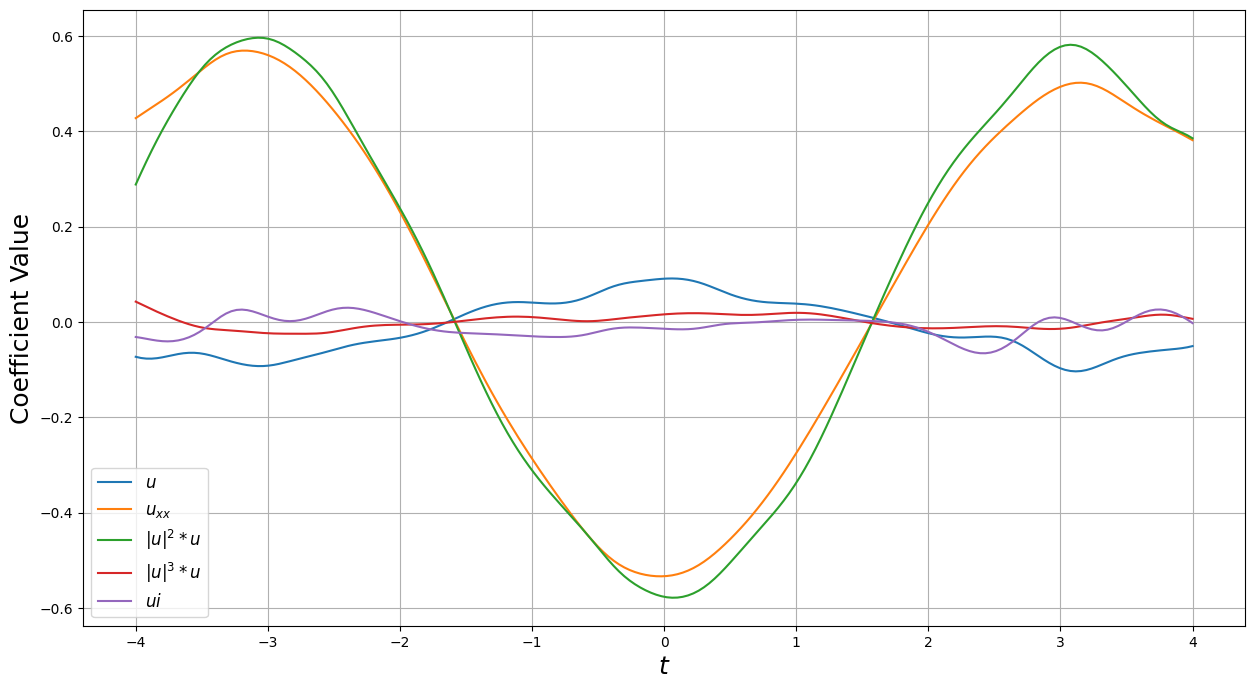

Plot saved as vc_plot/nls2_4.pdf


In [45]:
lam = 1e-5
d_tol = 5
W =  model.G_STRidge(input_k, lam, d_tol, t_steps, x_steps, type='complex')
model.ridge_plot(d_tol, x, filename="nls2_4")

saving model version 0.32
saving model version 0.33


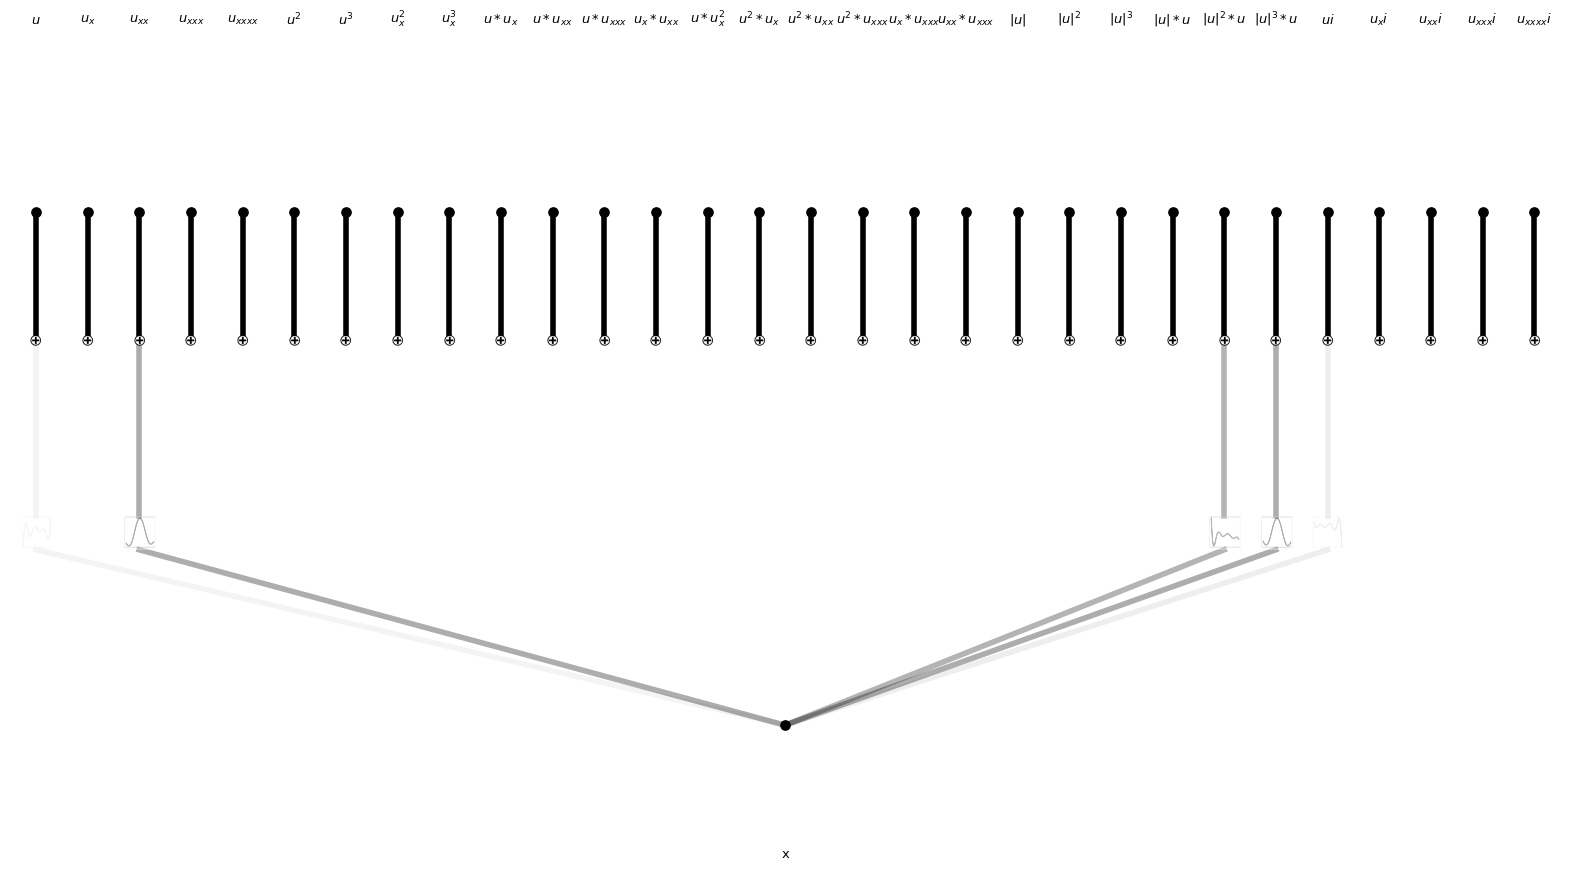

In [46]:
model.active_remove_edge(4)
model.active_remove_edge(29)
model.kan_plot()

In [47]:
model.fit(input_r, input_k, U_r, steps=50, alpha=0.1, lam=0.01, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls3_iter5')

  0%|          | 0/50 [00:00<?, ?it/s]

Training on cuda


100%|██████████| 50/50 [09:59<00:00, 11.98s/it, loss=-4.48, loss_data=0.0092, loss_pde=0.00365, loss_reg=1.78] 


saving model version 0.41


/home/ubuntu/miniconda3/envs/pykan-env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


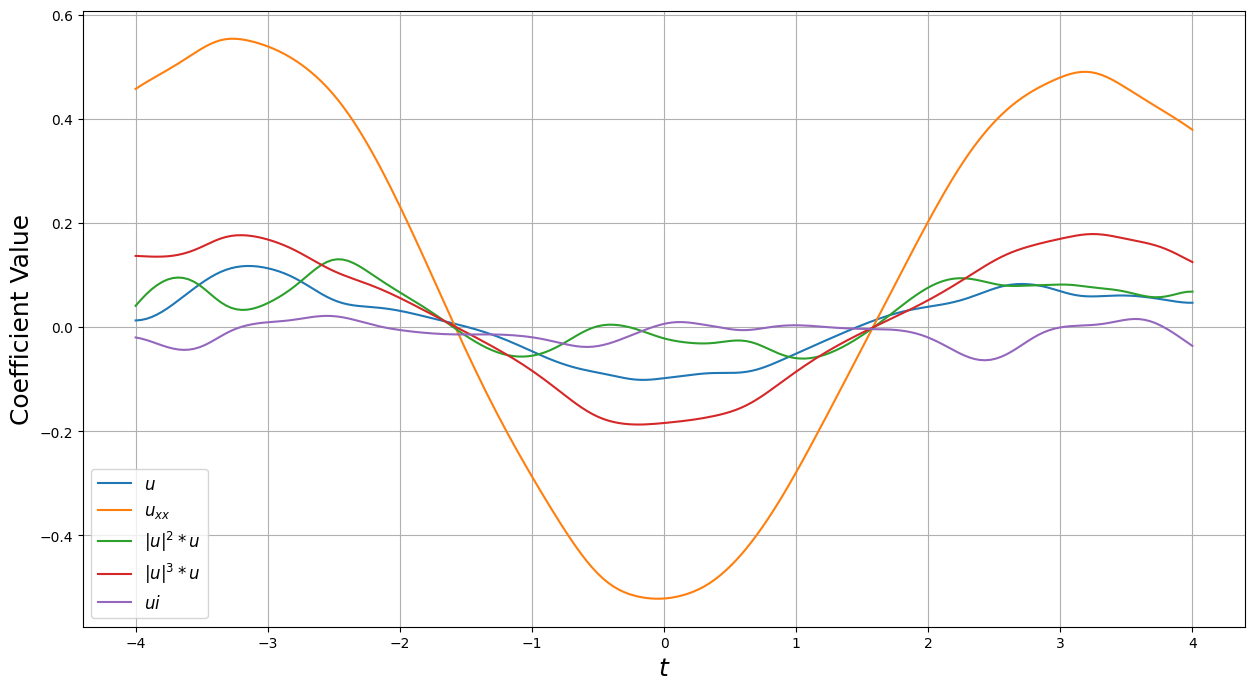

Plot saved as vc_plot/nls2_5.pdf


In [56]:
lam = 1e-5
d_tol = 5
W =  model.G_STRidge(input_k, lam, d_tol, t_steps, x_steps, type='complex')
model.ridge_plot(d_tol, x, filename="nls2_5")

In [57]:
model.fit(input_r, input_k, U_r, steps=50, alpha=0.01, lam=0.0, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls3_iter6')

  0%|          | 0/50 [00:00<?, ?it/s]

Training on cuda


100%|██████████| 50/50 [11:12<00:00, 13.44s/it, loss=-4.73, loss_data=0.00878, loss_pde=0.00613, loss_reg=2.56]


saving model version 0.53


/home/ubuntu/miniconda3/envs/pykan-env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


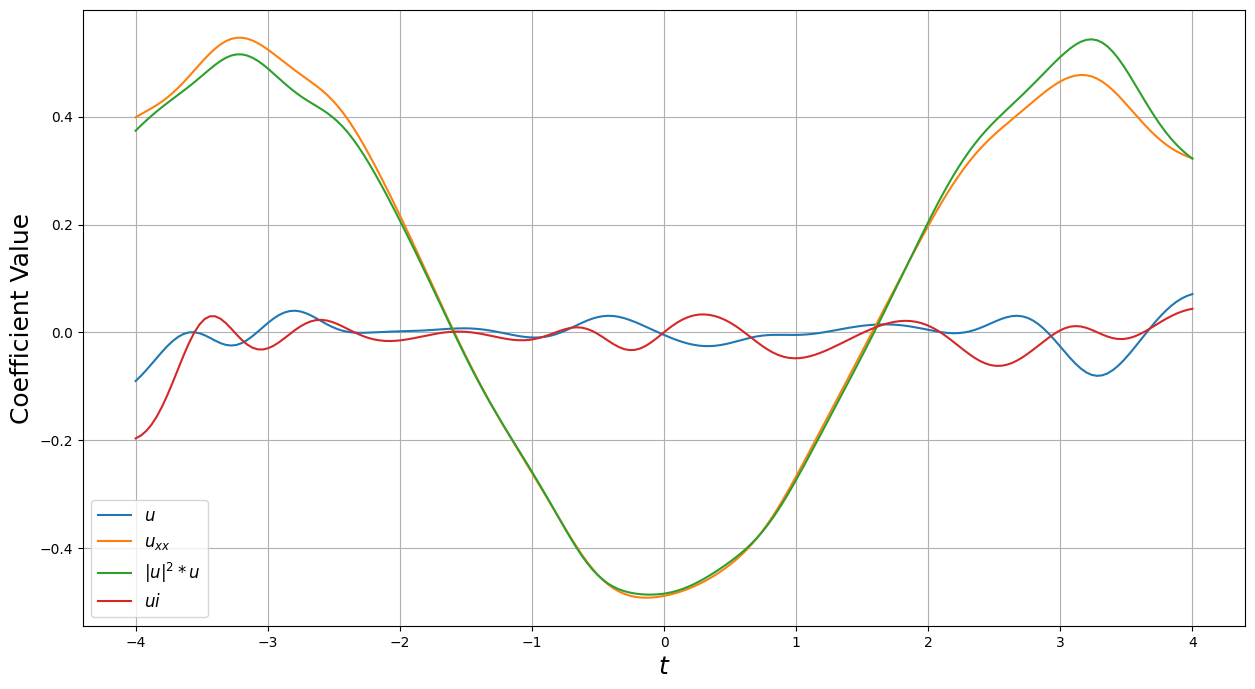

Plot saved as vc_plot/nls2_6.pdf


In [70]:
lam = 1e-5
d_tol = 10
W =  model.G_STRidge(input_k, lam, d_tol, t_steps, x_steps, type='complex')
model.ridge_plot(d_tol, x, filename="nls2_6")

saving model version 0.54


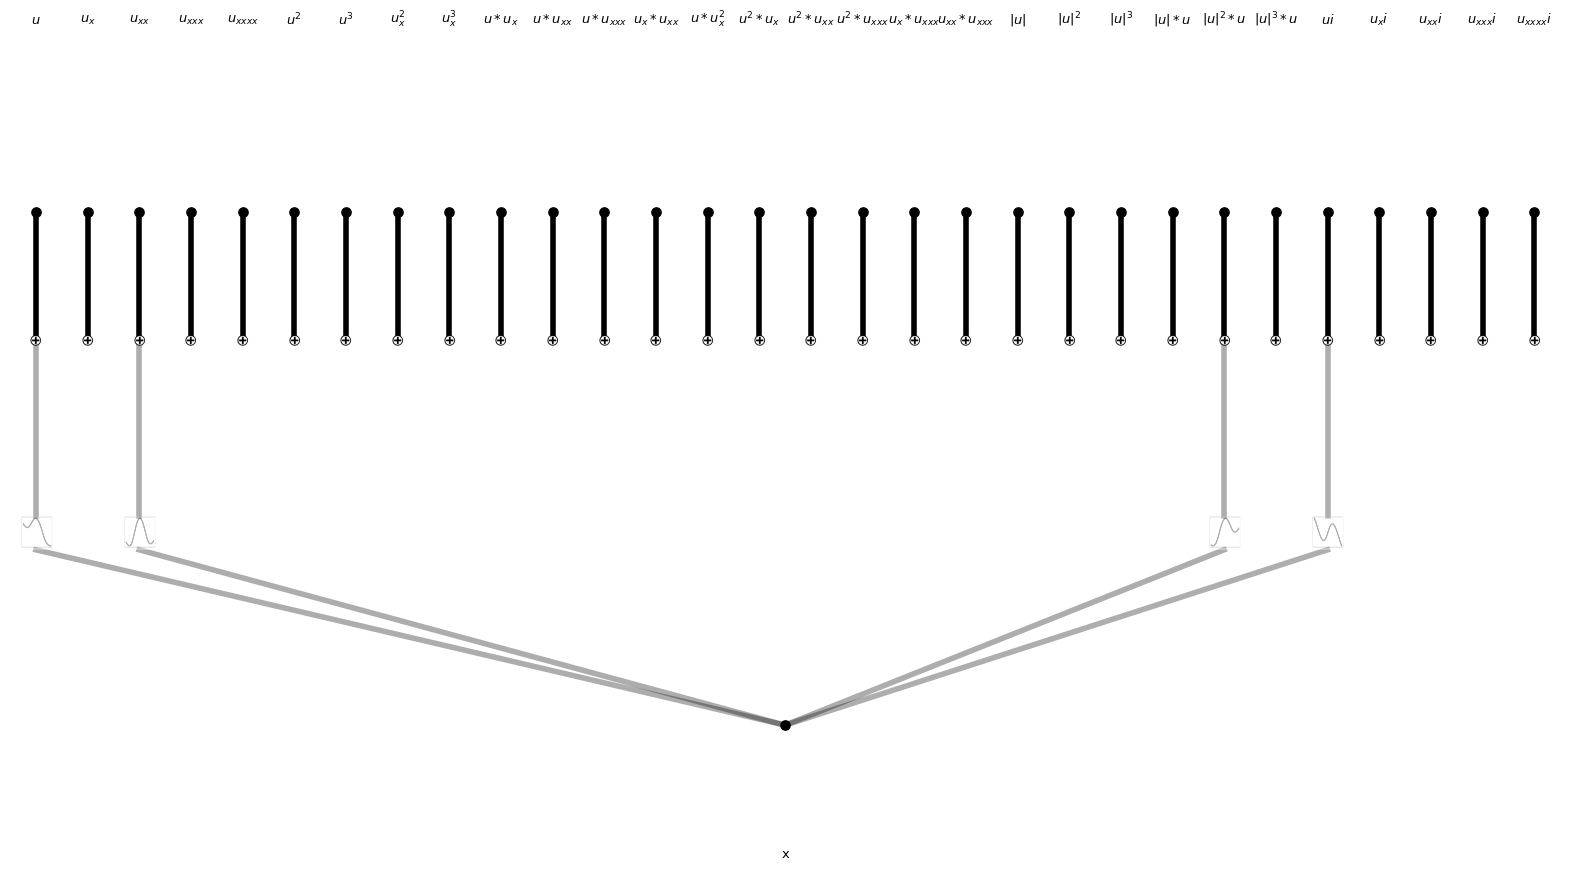

In [71]:
model.active_remove_edge(24)
model.kan_plot()

In [99]:
model.fit(input_r, input_k, U_r, steps=80, alpha=0.1, lam=0.1, lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls3_iter7')

  0%|          | 0/80 [00:00<?, ?it/s]

Training on cuda


 64%|██████▍   | 51/80 [10:47<06:07, 12.69s/it, loss=-3.58, loss_data=0.00903, loss_pde=0.00632, loss_reg=1.83]


KeyboardInterrupt: 

saving model version 0.1


/home/ubuntu/miniconda3/envs/pykan-env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


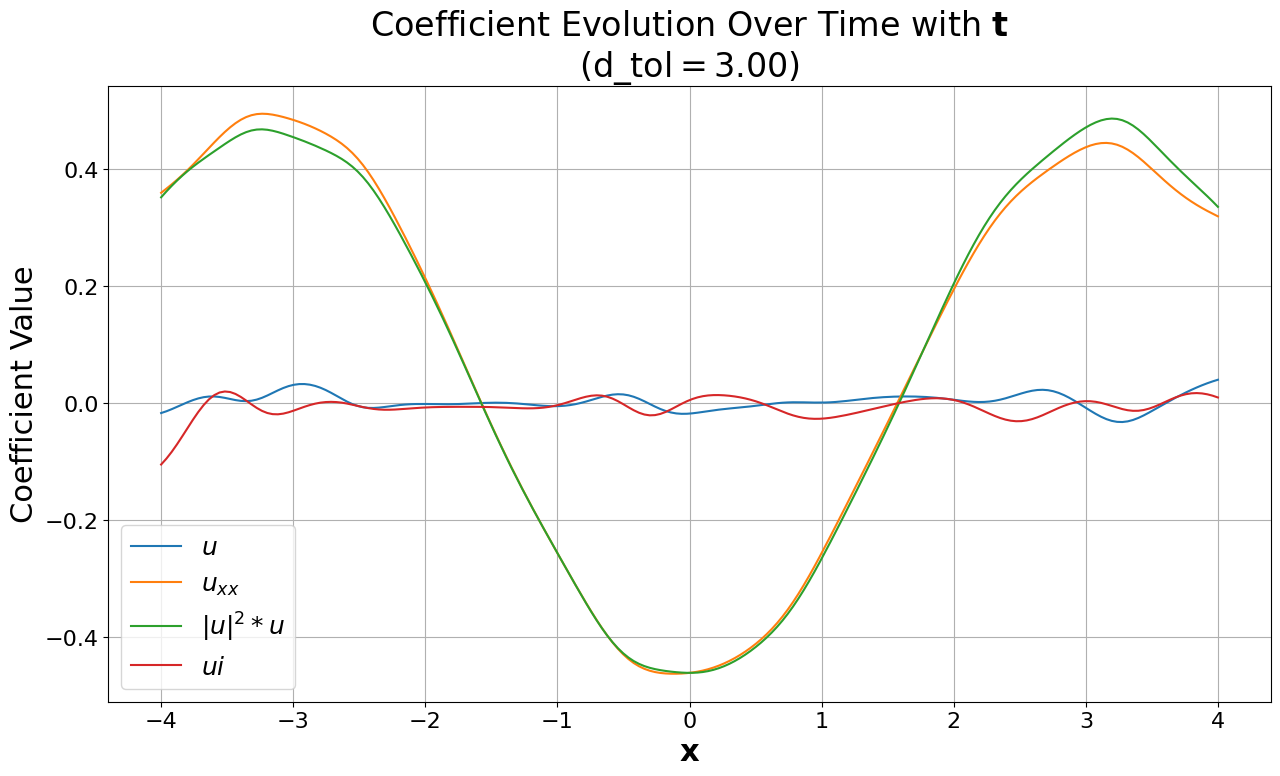

Plot saved as vc_plot/nls2_7.pdf


In [5]:
lam = 1e-5
d_tol = 3
W =  model.G_STRidge(input_k, lam, d_tol, t_steps, x_steps, type='complex')
model.ridge_plot(d_tol, x, filename="nls2_7")

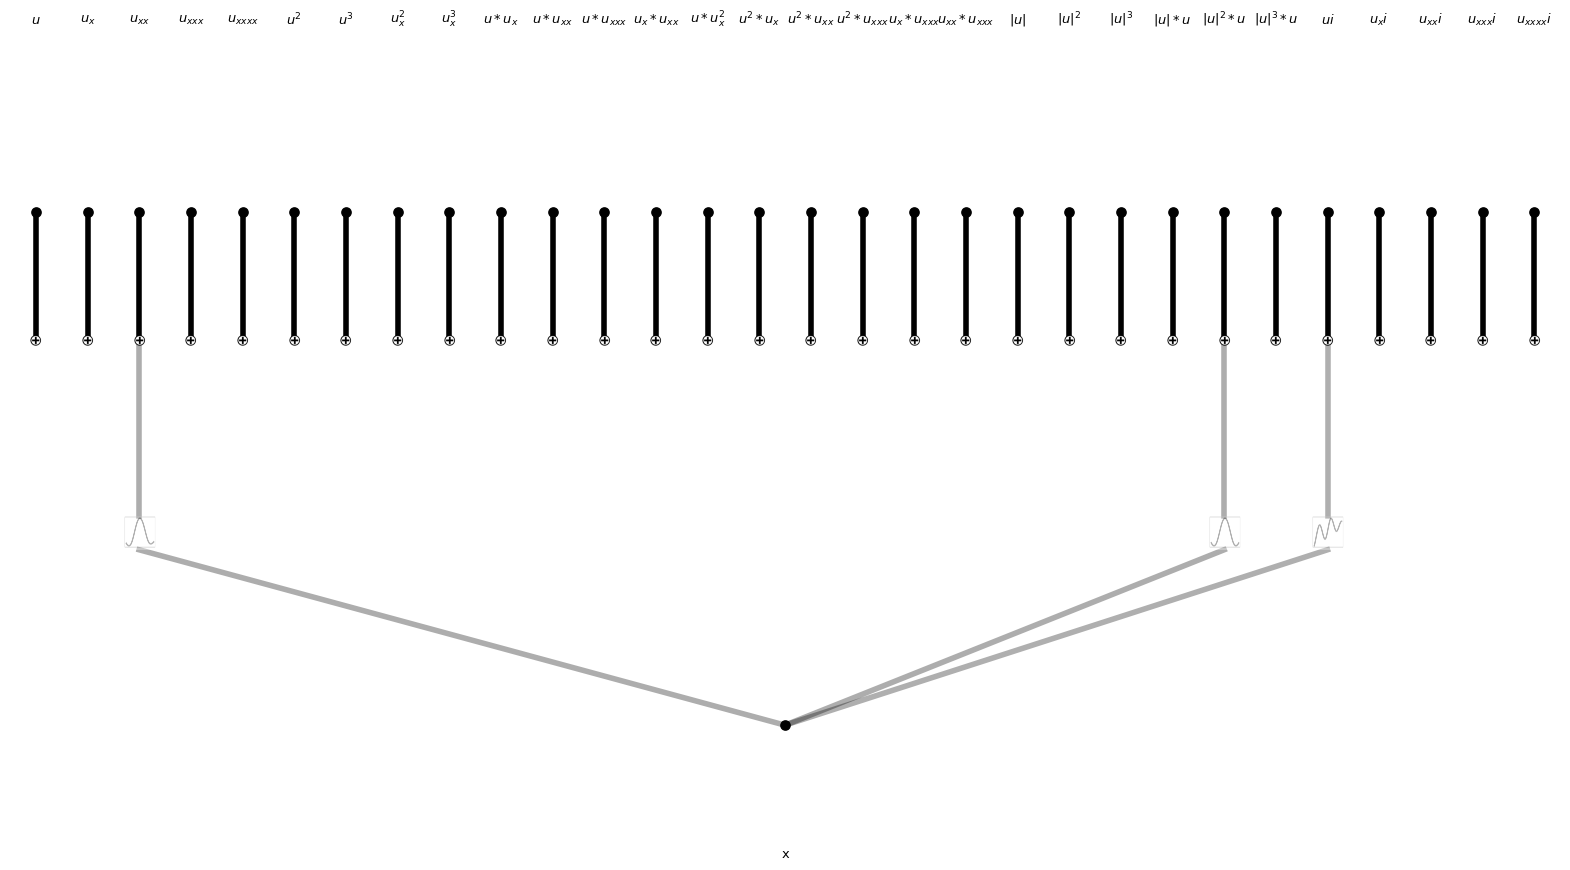

In [7]:
model.kan_plot()

In [7]:
model.active_remove_edge(0)
model.fit(input_r, input_k, U_r, steps=100, alpha=1, lam=0., lamb_l1=1., lamb_coef=1, lamb_coefdiff=0., lamb_entropy=2., normal=False, mode='all', type='complex', save_fig=True, img_folder='./nls3_iter8')

saving model version 0.2


  0%|          | 0/100 [00:00<?, ?it/s]

Training on cuda


100%|██████████| 100/100 [23:16<00:00, 13.97s/it, loss=-4.7, loss_data=0.00899, loss_pde=6.99e-5, loss_reg=2.01] 


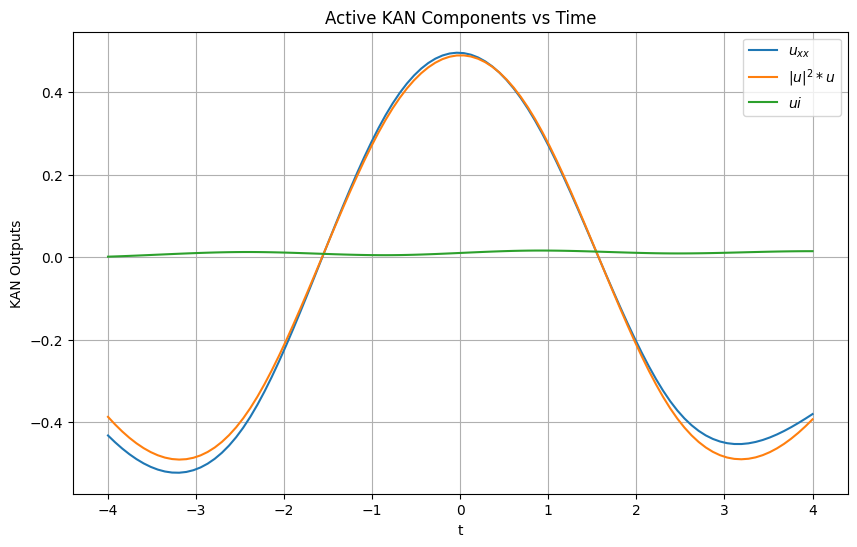

In [6]:
model.plot_kan_components()

checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
Active Indices: [ 2 23 25]


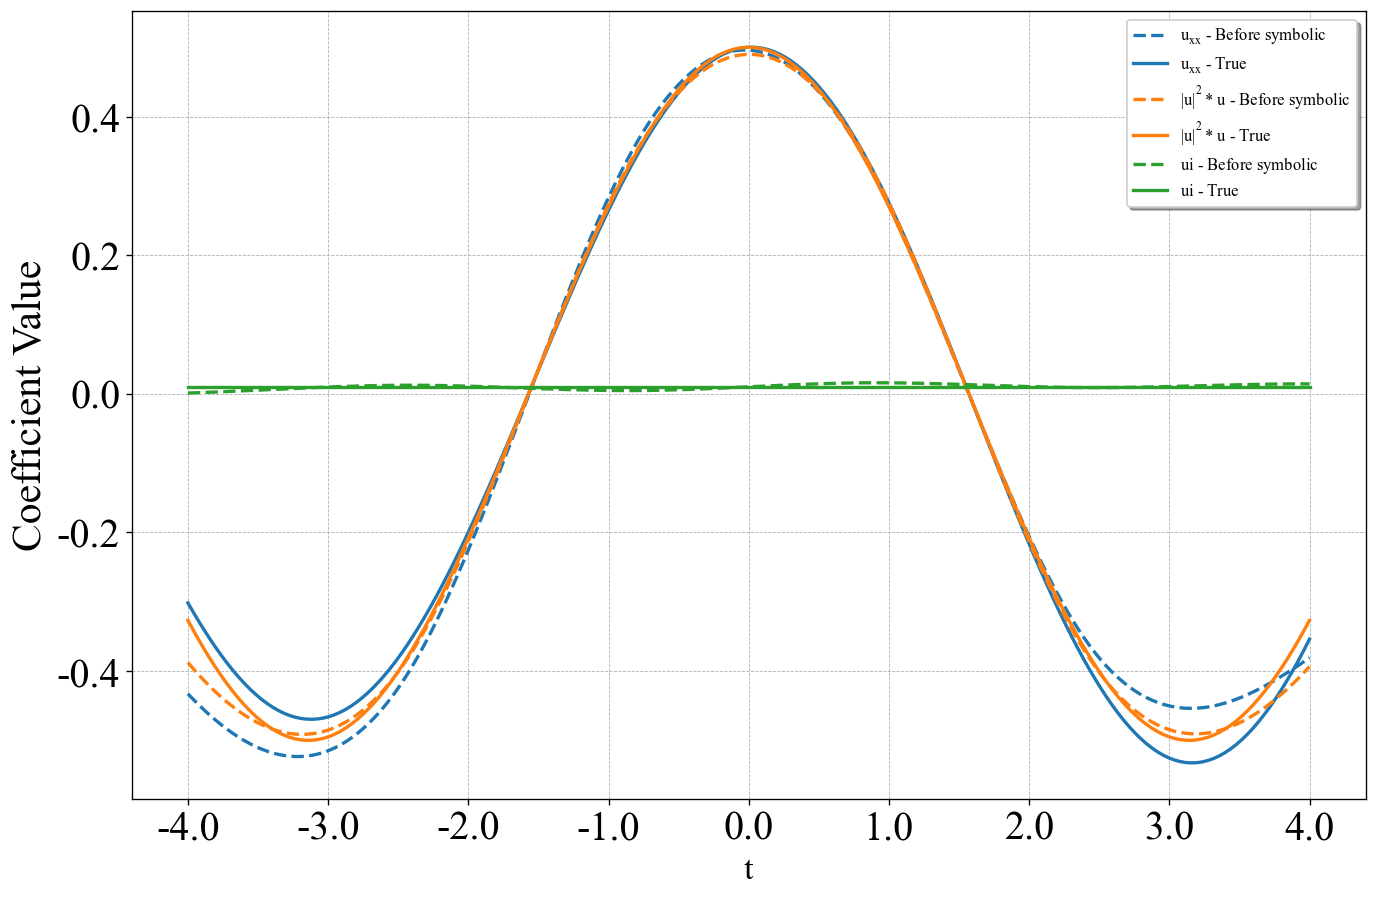

In [7]:
f1 = lambda x: 0.5*np.exp(0.02*x)*np.cos(x)
f2 = lambda x: 0.01 * np.ones_like(x)
f3 = lambda x: 0.5*np.cos(x)
true_sol = {
    2: f1,
    23: f3,
    25: f2,
}

org_model = VC_PIKAN(Nd=Nd, Nh=Nh, Nb=Nb, rhs_des=rhs_des, range_x=x_range, range_t=t_range, output_dim=2, seed=6666, grid=5, device=device)
org_model.load_state_dict(torch.load('nls3_iter8.pt'))

plot_results.plot_variable_coefficients(org_model, true_sol, x_range, t_range, save_fig=True, file_name='nls2')

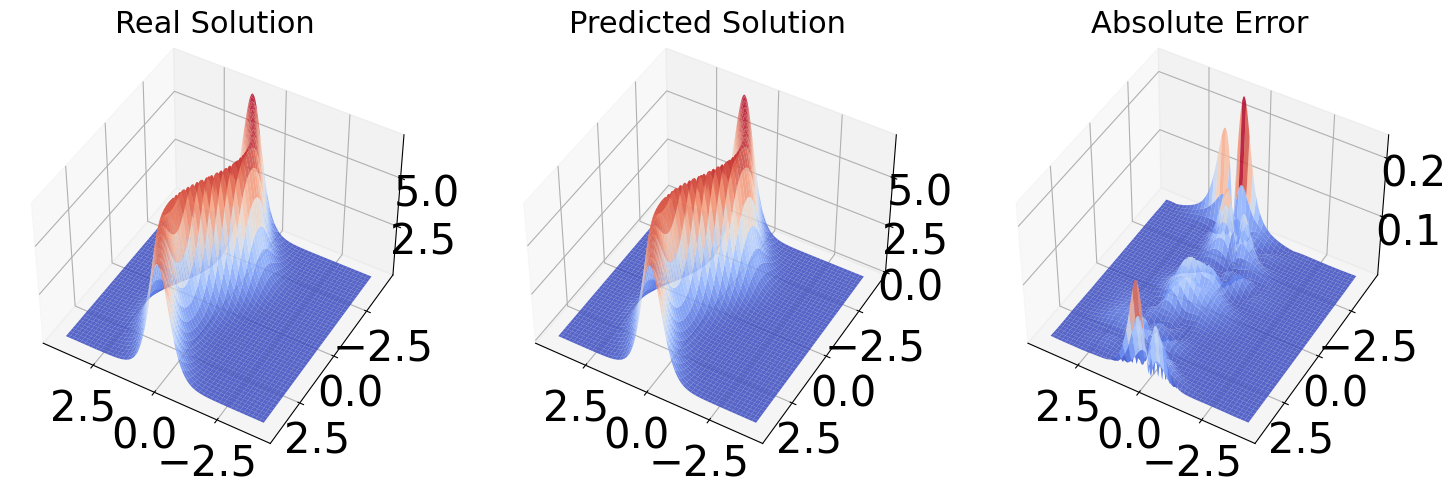

In [8]:
plot_solutions(t_range, x_range, params, model, fun_type = 'two')